In [1]:
%run "../../shared/utilz_includez.ipynb"

# 1. Images as np.array

- library `skimage`


In [2]:
## 1.skimage 

from skimage import io

In [82]:
def plot_image( img_array , cmapd=None):     
    print( f"image.shape = {img_array.shape}" ) 
    print( f"datatype = {img_array.dtype}")
    print( f"min = {np.min(img_array)} , max = {np.max(img_array)}\n" )
    if cmapd:
        plt.imshow( img_array , cmap=cmapd)
    else:
        plt.imshow( img_array )

(240, 600, 3)
image.shape = (240, 600, 3)
datatype = uint8
min = 13 , max = 255


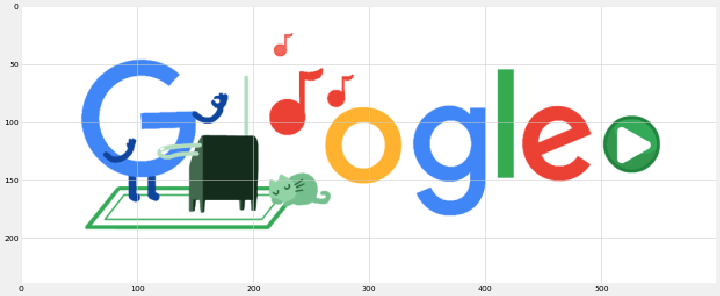

In [4]:
img = io.imread("https://9to5google.com/wp-content/uploads/sites/4/2020/04/popular-google-doodle-games-4-theremin.png?w=600")
## is a numpy array 
print( img.shape ) 
plot_image( img )

image.shape = (100, 200)
datatype = float64
min = 9.384619828001206e-05 , max = 0.9999494351875864


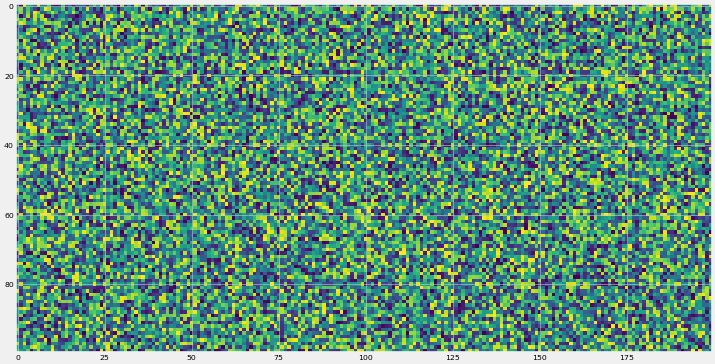

In [5]:
## create random image 
rimg = np.random.random([100, 200])
plot_image( rimg )

image.shape = (240, 600, 3)
datatype = float64
min = 0.050980392156862744 , max = 1.0


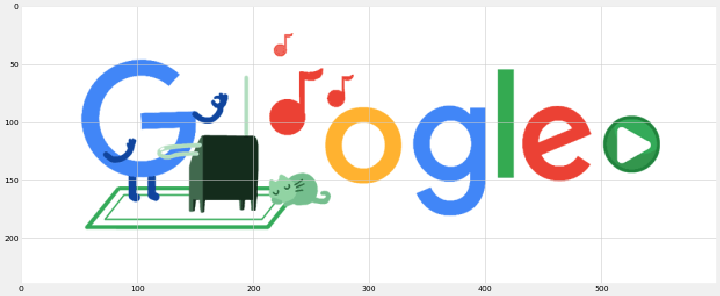

In [6]:
##<< values can be uint8[0,255] or float[0,1] or other.
## methods for converting images e.g. img_to_float. But take care not to loose as you convert to smaller values 
from skimage import img_as_float 
plot_image( img_as_float(img) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image.shape = (240, 600, 3)
datatype = float64
min = 0.16823529411764704 , max = 3.3


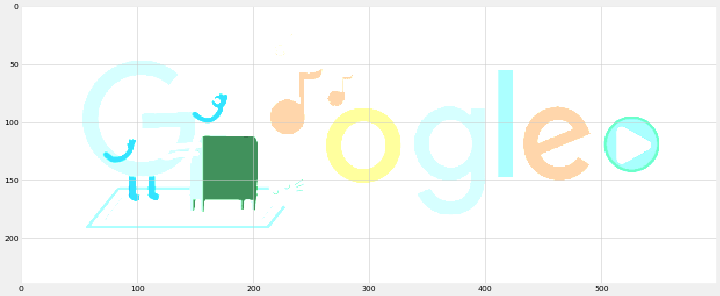

In [7]:
## Can perform any np math operations on the img arrays as they are np.arrays
plot_image( img_as_float(img)*3.3 )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image.shape = (240, 600, 3)
datatype = float64
min = 0.0 , max = 255.0


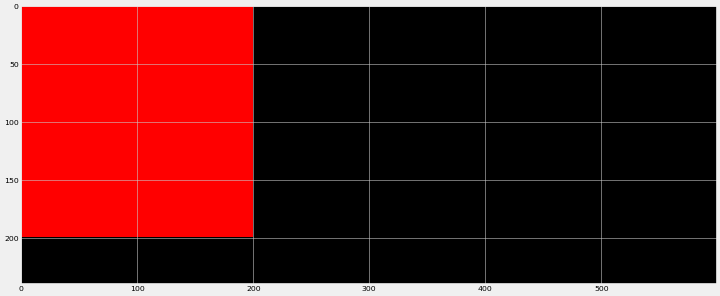

In [8]:
## can overlay images 

# create red overlay 
rimg = np.zeros(img.shape)
rimg[ :200, :200, :] = [255, 0, 0] ## set r g b values

plot_image( rimg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image.shape = (240, 600, 3)
datatype = float64
min = 18.0 , max = 510.0


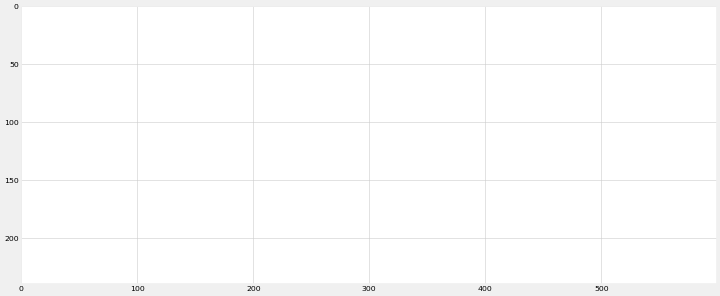

In [9]:
# add it to our image 
plot_image( rimg + img ) 

# 2. Different Libraries

**Libraries**
- `skimage` from scikit-image 
    - reads into np.array ( `io.imread`) See sec 1 above 
    - for image processing e.g. segmentation, feature extraction, geom_transform, color space manipulation, analysis, filtering, 
    - good pkg for traditional machine learning tasks 

- `pillow` or `PIL` 
    - doesn't read into np.array. You need to explicitly convert 
    - doesn't read remote; requires local file??
    - has an artillery of image manipulation and processing tools. Opening files is just a helper
    - For basic image processing. Won't do advance computer vision/ML tasks 
    
    
    
- `matplotlib` 
    - not for image processing. Is for plotting 
    - has tools for importing images 
    - `matplotlib.image` for importing 
        - Reads in as np.array 
    - `plt.imshow` for plotting 

- `opencv` 
    - More heavyweight; focused on computer vision. Can do images and live videos. 
    - Advanced image processing Good for AI stuff too. 
    - reads as np.array
    - Orders colors as BGR and not RGB

- `czifile`
    - For handling proprietary images e.g from OME microscope images, MS format czi 
    - `czifile.imread('path')
    - can be greater than 3D. E.G. to add time dimension, 
    
- `apeer_ometiff.io` OME-TIFF format 
    -   Is 5D image and has embedded xml data 
    - `img, xml = io.read_ometiff( tif_path )
    
    

<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=871x928 at 0x7FD584246110>

 Format =  PNG


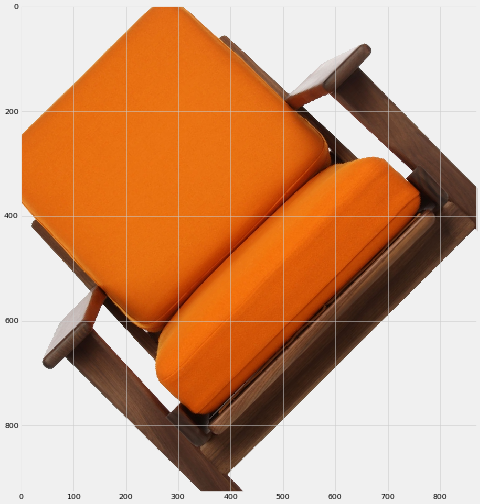

In [10]:
## 2. Pillow
from PIL import Image

pimg = Image.open('furniture.png')

print( type(pimg) ) ## is not np.array 
print( pimg )
print( "\n Format = ", pimg.format )
plt.imshow( pimg.rotate(45) ); 
#pimg.rotate(45).show() ##OR directly from pil


image.shape = (928, 871, 4)
datatype = float64
min = 0.0 , max = 0.3


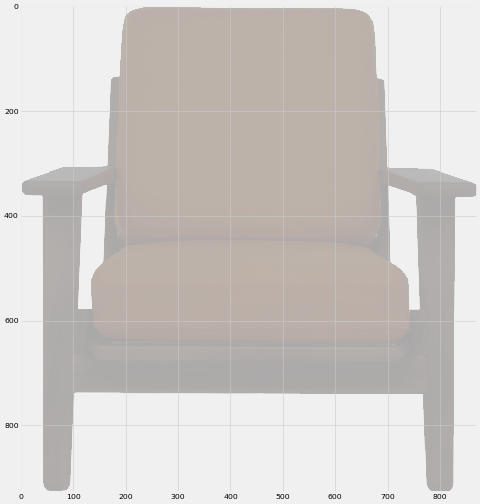

In [11]:
pimg_array = np.asarray( pimg )
plot_image( img_as_float(pimg_array)*0.3 ) 

In [12]:
## 3. Matplotlib
import matplotlib.image as mpimg 

<class 'numpy.ndarray'>
image.shape = (240, 600, 3)
datatype = float32
min = 0.03529411926865578 , max = 1.0


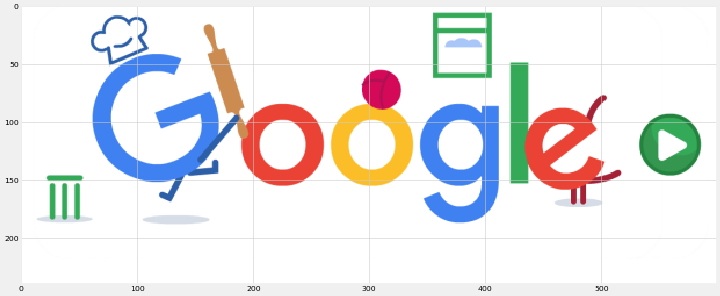

In [13]:
mimg = mpimg.imread( "https://9to5google.com/wp-content/uploads/sites/4/2020/04/popular-google-doodle-games-2-cricket.png?w=600") 

print( type(mimg) )
plot_image( mimg )

image.shape = (240, 600)
datatype = float32
min = 0.13725490868091583 , max = 1.0


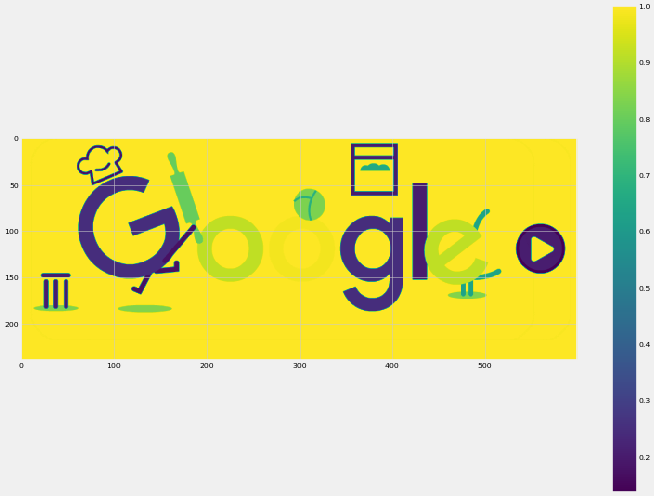

In [14]:
plot_image( mimg[:, :, 0] )
plt.colorbar(); 

In [15]:
## 4. OpenCV
import cv2

TYPE: <class 'numpy.ndarray'>
image.shape = (928, 871)
datatype = uint8
min = 2 , max = 255
image.shape = (928, 871, 3)
datatype = uint8
min = 2 , max = 255


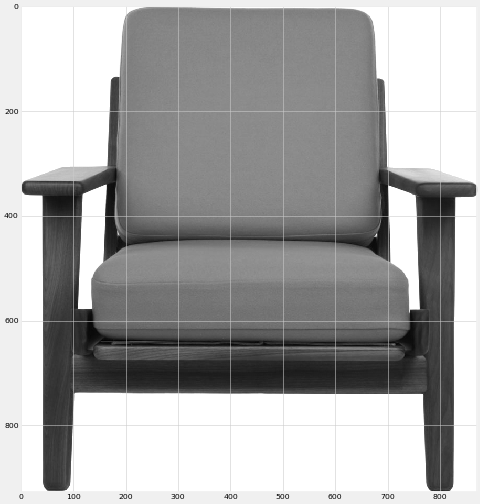

In [16]:
#cimg = cv2.imread( "https://9to5google.com/wp-content/uploads/sites/4/2020/05/popular-google-doodle-games-8-magic-cat-academy.png?w=600")
cimg = cv2.imread( 'furniture.png' , 0) ## 0 = grayscale 

print( f"TYPE: {type(cimg)}")
plot_image( cimg )

## Change to RGB from BGR so it shows correctly as grayscale 
plot_image( cv2.cvtColor( cimg , cv2.COLOR_BGR2RGB) )

In [17]:
## Using inbuilt imshow
# cv2.imshow( 'title bar', cimg)
# cv2.waitKey( 0 ) ## 0 = until i close it
# cv2.destroyAllWindows()

# 3. More PILLOW

In [18]:
from PIL import Image

def show_pil_img( pimg ): 
    print(f"TYPE: {type(pimg) }")
    print(f"FORMAT: { pimg.format }")
    print(f"MODE: { pimg.mode }")
    print(f"SIZE: { pimg.size }")
    plt.imshow( pimg); 

TYPE: <class 'PIL.PngImagePlugin.PngImageFile'>
FORMAT: PNG
MODE: RGBA
SIZE: (871, 928)


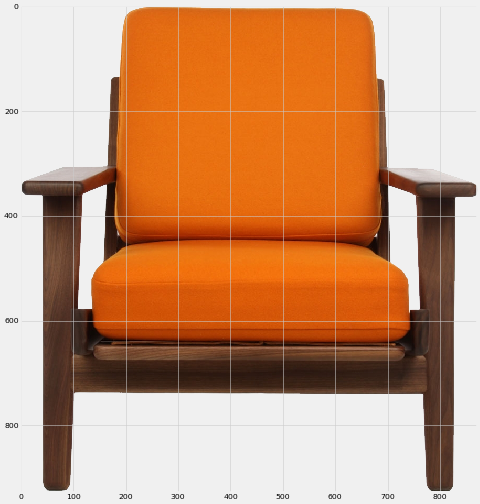

In [19]:
pimg = Image.open( 'furniture.png' )
show_pil_img( pimg)

TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (200, 20)


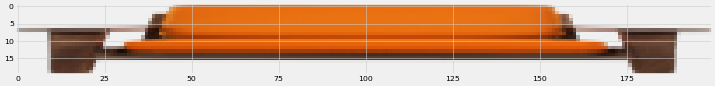

In [20]:
## REsizing <<< does a squeesh; doesn't keep aspect ration 
show_pil_img( pimg.resize( (200, 20) ) ) 

TYPE: <class 'PIL.PngImagePlugin.PngImageFile'>
FORMAT: PNG
MODE: RGBA
SIZE: (19, 20)


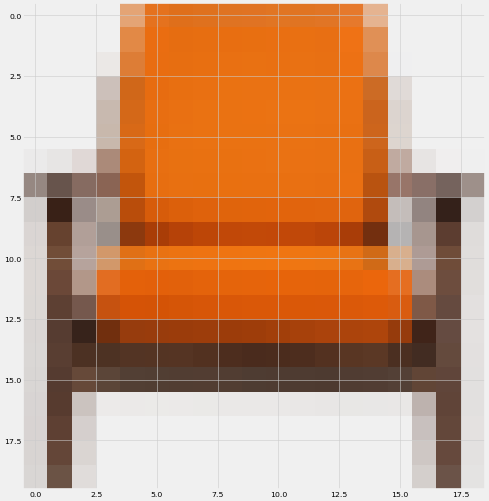

In [21]:
## thumbnail = REsizing with aspect ratio. Will not  make bigger than source 
pimg.thumbnail( (200, 20) ) ## returns none; alters in placeS
show_pil_img( pimg ) 

TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (610, 110)


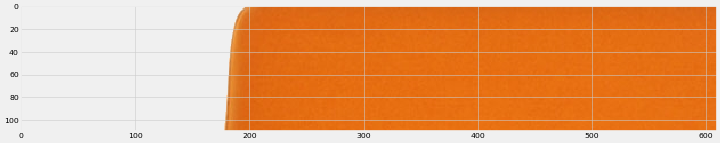

In [22]:
## CROPPING
pimg = Image.open( 'furniture.png' ) 
show_pil_img( pimg.crop( (10, 10, 620, 120)  )  )

TYPE: <class 'PIL.PngImagePlugin.PngImageFile'>
FORMAT: PNG
MODE: RGBA
SIZE: (871, 510)


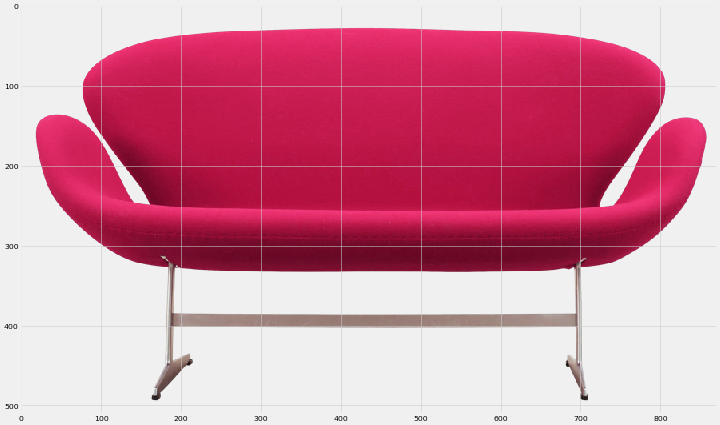

In [23]:
##overlace
p2 = Image.open('furniture2.png' )
p2.thumbnail( pimg.size ) ## resized to first image sizeS
show_pil_img( p2)

TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (871, 928)


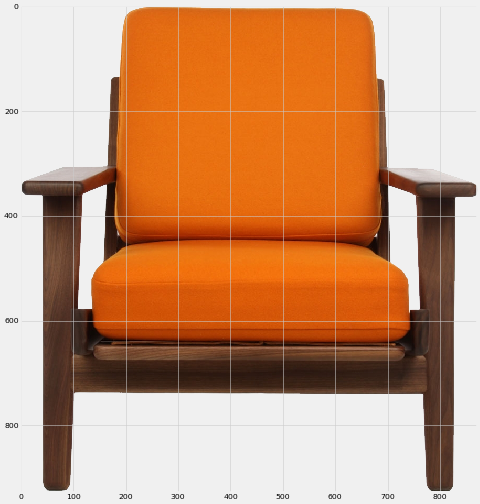

In [24]:
p1 = pimg.copy()
show_pil_img( p1 )

TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (871, 928)


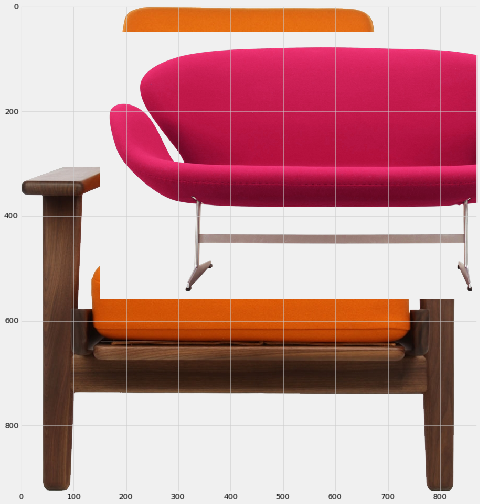

In [25]:
p1.paste( p2, (150,50) ) ## 
show_pil_img( p1 )

TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (1241, 1220)


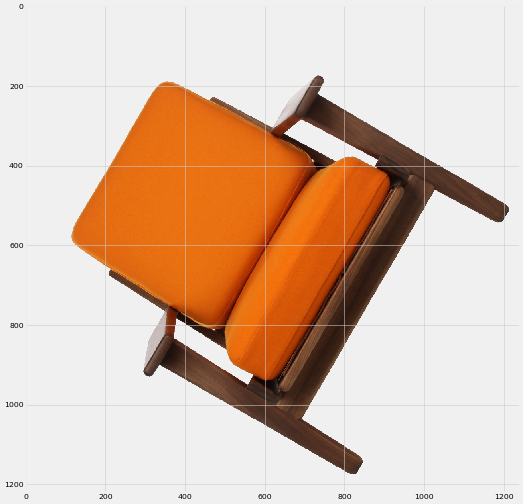

In [26]:
## Image ROtation
show_pil_img( pimg.rotate(60, expand=True)) ## if expand=false, it will crop out

TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: P
SIZE: (360, 360)


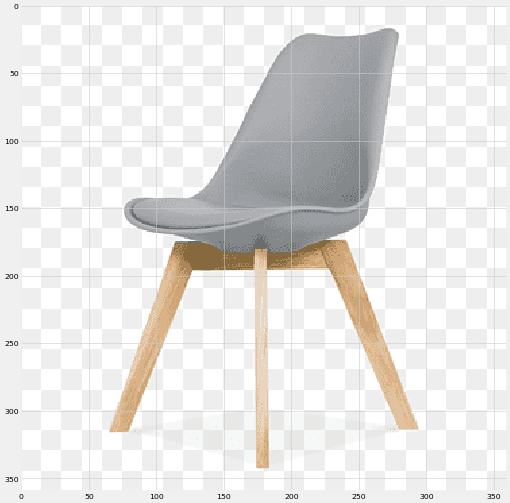

In [27]:
## transpose image; Flips on x or y mirror line by 180 and
show_pil_img( Image.open('furniture3.png').transpose(Image.FLIP_LEFT_RIGHT ) ) 
#show_pil_img( pimg.transpose(Image.FLIP_TOP_BOTTOM ) ) 

TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: L
SIZE: (871, 928)


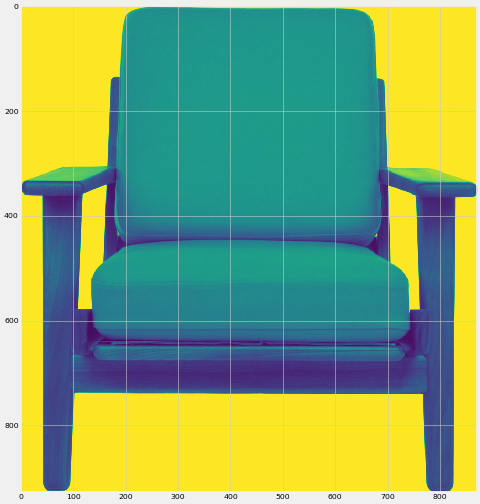

In [28]:
## Convert to GrayScale: 
show_pil_img( pimg.convert('L') ) ##others: RGB, CMYK, L


FILE: alt_furniture.png
TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (164, 164)

FILE: alt_furniture2.png
TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (156, 152)

FILE: alt_furniture3.png
TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: P
SIZE: (164, 164)

FILE: furniture.png
TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (160, 158)

FILE: furniture2.png
TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: RGBA
SIZE: (122, 140)

FILE: furniture3.png
TYPE: <class 'PIL.Image.Image'>
FORMAT: None
MODE: P
SIZE: (164, 164)


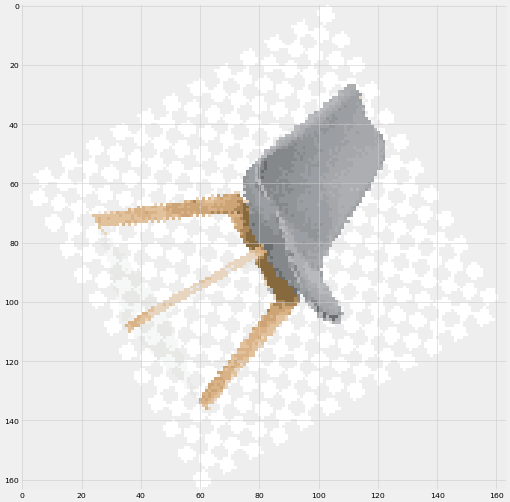

In [29]:
## 
import glob

for f in glob.glob("*.png"):
    print(f"\nFILE: {f}")
    i = Image.open(f)
    i.thumbnail( (120, 120))
    i = i.rotate( -60, expand=True) 
    show_pil_img( i )
    i.save( f"alt_{f}")

# 4. More SCIPY
- is part of np stack and not specifically for image processing. includes fourier transform, signal processing, 

- image processing is actually in misc :/

- reads into np.array 


In [30]:
from scipy import misc

### go deprecated and is not removed :/
# simg = misc.imread( "https://www.pngitem.com/pimgs/m/4-42862_transparent-table-and-chairs-png-living-room-furniture.png")
# print( f"FTYPE: {type(simg) }" )

image.shape = (360, 360, 4)
datatype = uint8
min = 60 , max = 255


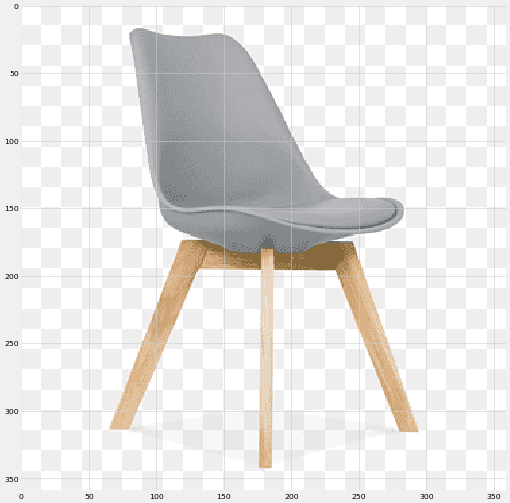

In [31]:
simg = io.imread( 'furniture3.png') #, as_gray=True) ##using skimage to read it
plot_image( simg )

image.shape = (10, 8, 4)
datatype = uint8
min = 165 , max = 255


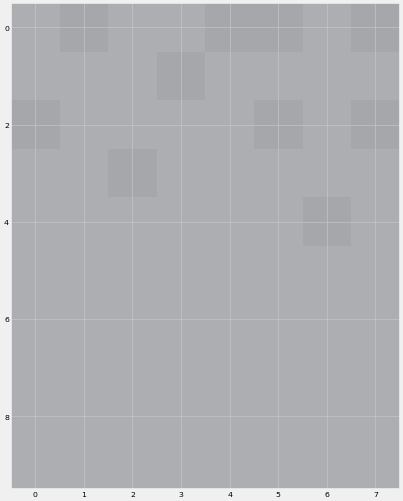

In [32]:
## extract individual pixel values; slicing
plot_image( simg[30:40, 152:160: , :])

In [33]:
## math ops
print( f"MEAN: { simg.mean() }" )
print( f"MAX: { simg.max() }" )
print( f"MIN: { simg.min() }" )

MEAN: 235.55908564814814
MAX: 255
MIN: 60


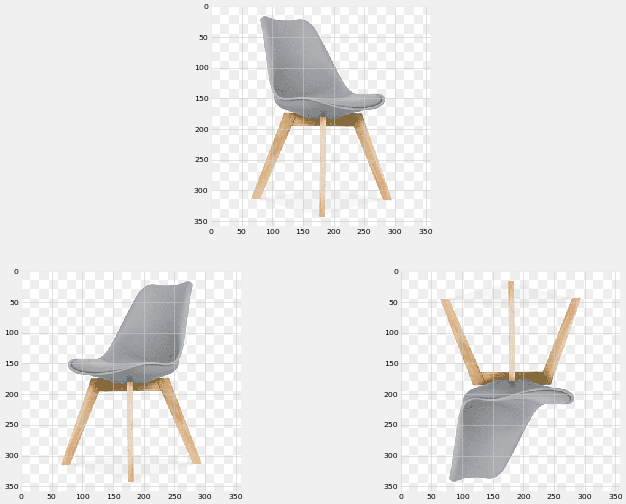

In [34]:
## gEOMETRIC TRANSFORMATIONS
# using numpy as np 
## FLIP/transpose 
#plot_image( np.fliplr(simg ) ) ## left right 
#plot_image( np.flipud(simg ) ) ## top down 
plt.subplot(2, 1, 1)
plt.imshow( simg , cmap='Blues') #Blues, hsv, Greys
plt.subplot(2, 2, 3)
plt.imshow( np.fliplr( simg) )
plt.subplot(2, 2, 4)
plt.imshow( np.flipud(simg) ); 

image.shape = (478, 478, 4)
datatype = uint8
min = 0 , max = 255


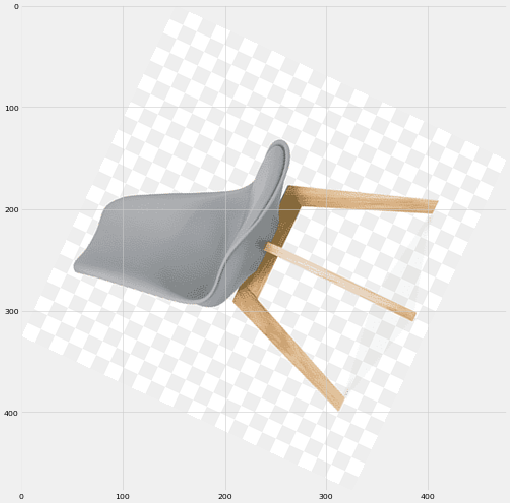

In [35]:
from scipy import ndimage

##Rotate
plot_image( ndimage.rotate(simg, 65, reshape=True)) # reshape === expand and truncating 

image.shape = (360, 360, 4)
datatype = uint8
min = 99 , max = 255
image.shape = (360, 360, 4)
datatype = uint8
min = 135 , max = 255
image.shape = (360, 360, 4)
datatype = uint8
min = 105 , max = 255
image.shape = (360, 360, 4)
datatype = uint8
min = 0 , max = 255


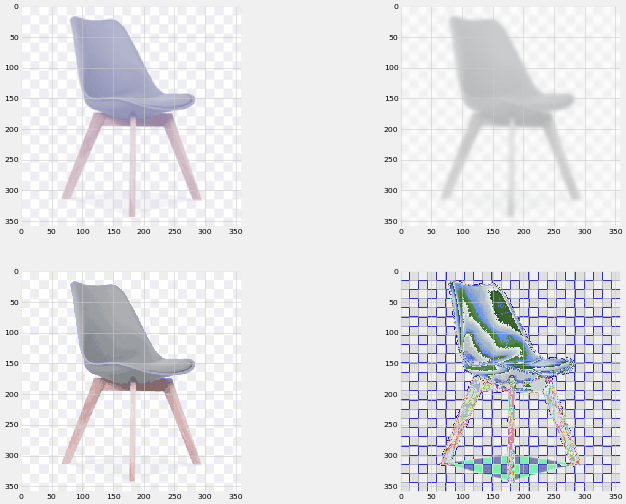

In [36]:
## Filtering E.G. uniform, guassian, 
## These filters also available in scikit-image, which is more dedicated to image processing than is scipy
# Blurring filters: uniform, gaussian (smooths noise bila preserving edges),
plt.subplot(2, 2, 1)
plot_image( ndimage.uniform_filter(simg, size=3))
plt.subplot(2, 2, 2)
plot_image( ndimage.gaussian_filter(simg, sigma=3)); 
plt.subplot(2, 2, 3) 
plot_image( ndimage.median_filter(simg, size=3)); # preseves edges 

##edge detection algorithm 
plt.subplot(2, 2, 4) 
plot_image( ndimage.sobel(simg, axis=2)); # axis default=-1


In [37]:
## numpy can do loads!!


# 5. More SCIKIT-IMAGE

In [43]:
from skimage import io
from matplotlib import pyplot as plt

## transforms
from skimage.transform import rescale, resize, downscale_local_mean

image.shape = (668, 1000)
datatype = float64
min = 0.0 , max = 1.0


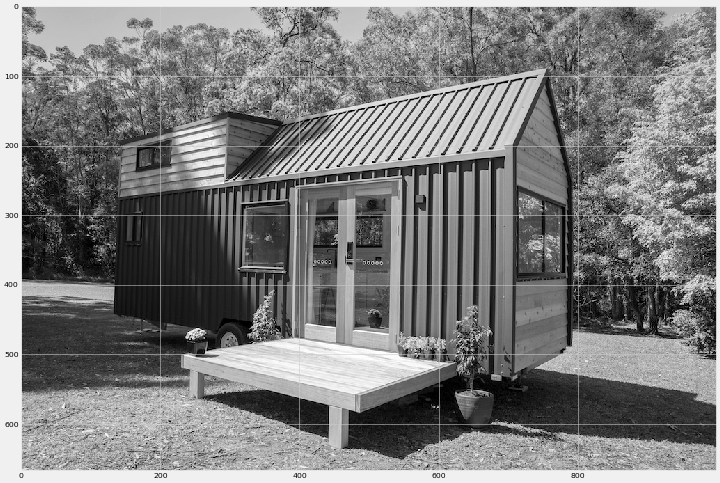

In [88]:
## read in image and as grayscale
imgpath = "https://files.theinteriorsaddict.com/uploads/2020/02/tiny-house-co1.jpg"
timg = io.imread( imgpath, as_gray=True)
plot_image( timg , cmapd='gray')

image.shape = (167, 250)
datatype = float64
min = 0.0037475977992417952 , max = 0.9833206898502296
image.shape = (167, 250)
datatype = float64
min = 0.00048735294117630435 , max = 0.9945233333333341


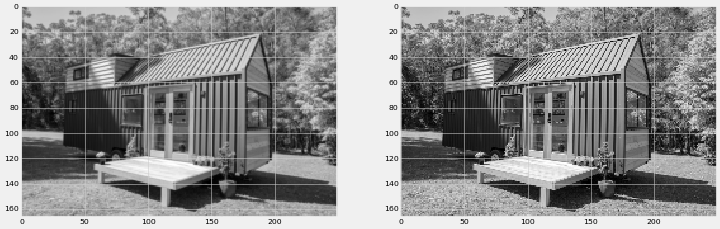

In [87]:
## rescale and resize
plt.subplot(1,2, 1)
plot_image( rescale(timg, 1/4, anti_aliasing=True), cmapd='gray')

plt.subplot(1,2, 2)
plot_image( rescale(timg, 1/4, anti_aliasing=False), cmapd='gray'); 

image.shape = (100, 200)
datatype = float64
min = 0.008912566756177999 , max = 0.9701207998090937


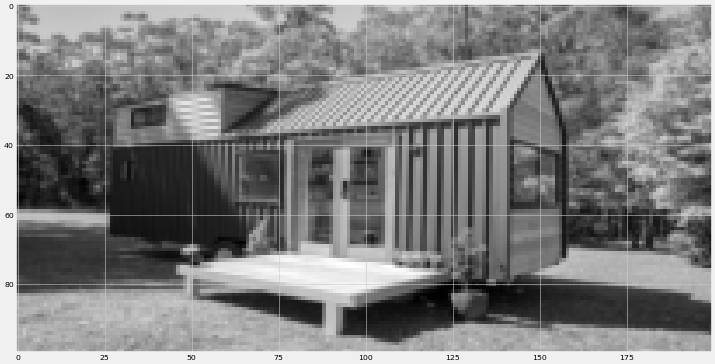

In [86]:
plot_image( resize(timg, (100,200), anti_aliasing=True), cmapd='gray')

image.shape = (167, 334)
datatype = float64
min = 0.0010020588235294117 , max = 0.9936861437908497


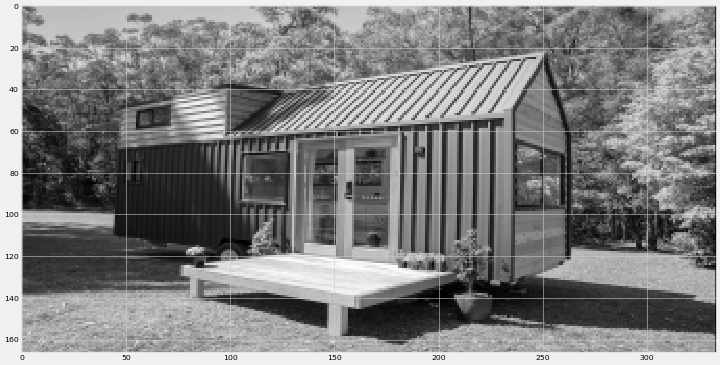

In [85]:
## Downscale
plot_image( downscale_local_mean(timg, (4, 3) ) , cmapd='gray')

### Edge Detection & Convolution

Here are 4 - 5 ways of doing edge detection using `skimage.filters` 
- `roberts` :
- `sobel` :
- `scharr` :
- `prewitt` :

In [65]:
from skimage.util import crop
from skimage.filters import roberts, sobel, scharr, prewitt

image.shape = (368, 1000)
datatype = float64
min = 0.0 , max = 0.7562052099518514
image.shape = (368, 1000)
datatype = float64
min = 0.0 , max = 0.629589564305204
image.shape = (368, 1000)
datatype = float64
min = 0.0 , max = 0.6769722408613452
image.shape = (368, 1000)
datatype = float64
min = 0.0 , max = 0.6196229196520263


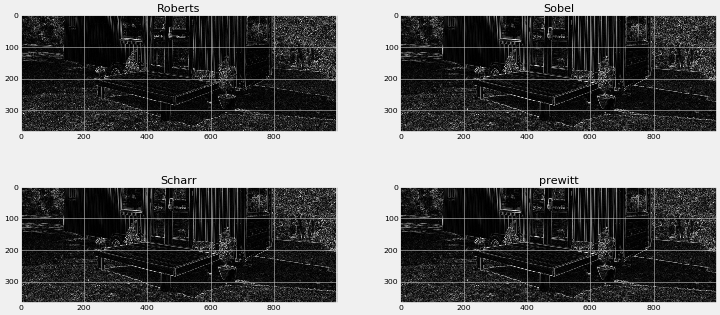

In [94]:
cimg = crop(timg, ((300,0), (0,0)), copy=False)

plt.subplot(3,2, 1)
plot_image( roberts( cimg ), cmapd='gray' )
plt.title("Roberts")

plt.subplot(3,2, 2)
plot_image( sobel( cimg ), cmapd='gray' )
plt.title("Sobel")

plt.subplot(3,2, 3)
plot_image( scharr( cimg ), cmapd='gray' )
plt.title("Scharr")

plt.subplot(3,2, 4)
plot_image( prewitt( cimg ), cmapd='gray' ); 
plt.title("prewitt"); 
